# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [2]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

[407, 276, 372]
Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,7362,12844,18683,2854,7883,553
1,27901,3749,6964,4479,603,2503
2,3884,3801,1641,876,397,4829


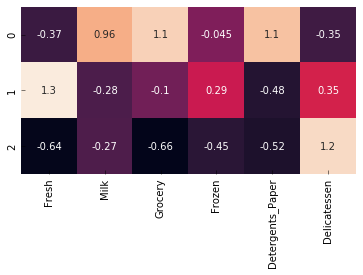

In [3]:
# TODO: Select three indices of your choice you wish to sample from the dataset
#import random
#indices = [ random.randrange(1,len(data)) for i in range(3) ]
indices = [407, 276, 372]
print indices

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)

import seaborn as sns

sns.heatmap((samples-data.mean())/data.std(ddof=0), annot=True, cbar=False, square=True)

### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  
*What kind of establishment (customer) could each of the three samples you've chosen represent?*  
**Hint:** Examples of establishments include places like markets, cafes, and retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant.

**Answer:**

| index | Fresh  | Milk  | Grocery | Frozen | Detergents_Paper | Delicatessen |
|-------|--------|-------|---------|--------|------------------|--------------|
| 181   | **112151** | 29627 | 18148   | 16745  | 4948             | 8550         |
| 86    | 22925  | **73498** | 32114   | 987    | 20070            | 903          |
| 85    | 16117  | 46197 | **92780**   | 1026   | 40827            | 2944         |
| 25    | 32717  | 16784 | 13626   | **60869**  | 1272             | 5609         |
| 85    | 16117  | 46197 | 92780   | 1026   | **40827**            | 2944         |
| 183   | 36847  | 43950 | 20170   | 36534  | 239              | **47943**        |


I derived this table by observing the maximum values for each of the field in the data set. Although, this data may contain an outlier but it gives some rough idea about the consumption of various kinds of establishments that are possible to exist. <br>


Like, now from the above table I can conclude following establishments:

1. **Index 181** , Can a Big Restaurant as it a large quantity of Fresh vegetables and fruits, followed by milk, frozen and grocery.

2. **Index 85**, Can be a SuperMarket as it has a large requirement for Grocery and Detergents_paper,followed by Milk and fresh items.

3. **Index 86**, Can be a Cafe as it requires a large volumes of Milk, followed by Grocery and Fresh items.

4. **Index 87**, Can be a Retailer of frozen products.

5. **Index 183**, Can be a Retailer of Delicatessen items.



For the point choosen above following things could be said:

1. For the first point chosen , as we can  observe that all the values are below average except for delicatessen, so it can be a retail shop with deli food.
2. For the second point chosen , all the features except for delicatessen is above average so we can say it can be a restuarant with deli food.
3. For the third point chosen , as we can  observe that all the values are below average except for delicatessen, so it can be a retail shop with deli food.


### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [7]:
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor
# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature

range_target_features = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen']

for feature in range_target_features:
    new_data =  data.copy(deep=True)

    new_data.drop([feature], axis = 1, inplace = True)

    labels = data[feature]

    # TODO: Split the data into training and testing sets using the given feature as the target
    X_train, X_test, y_train, y_test = train_test_split(new_data, labels,random_state = 23, test_size = 0.25)

    # TODO: Create a decision tree regressor and fit it to the training set
    regressor = DecisionTreeRegressor(min_samples_split = 2,random_state=42).fit(X_train,y_train)

    # TODO: Report the score of the prediction using the testing set

    score = regressor.score(X_test,y_test)

    print "for feature %s score is %f"%(feature,score)

for feature Fresh score is -1.795124
for feature Milk score is 0.427866
for feature Grocery score is 0.706929
for feature Frozen score is -0.062797
for feature Detergents_Paper score is 0.780082
for feature Delicatessen score is 0.023381


### Question 2
*Which feature did you attempt to predict? What was the reported prediction score? Is this feature is necessary for identifying customers' spending habits?*  
**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data.

**Answer:**

The feature I attempted to predict was **Detergents_Paper**.For the task of clustering or classification, we don't gain much by adding a feature which can be predicted by other features.No, this feature is not necessary for identifying customer's spending habits.

The Reported Prediction score: **0.780082**




### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

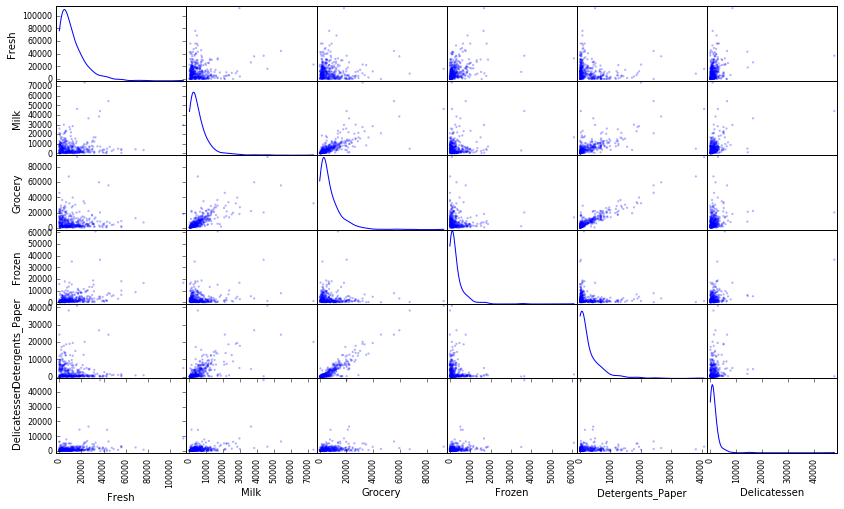

In [8]:
# Produce a scatter matrix for each pair of features in the data
pd.plotting.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Question 3
*Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?*  
**Hint:** Is the data normally distributed? Where do most of the data points lie? 

**Answer:**

All of the features appears to be Skewed right (positive), with the majority data points landing towards the right of the mode and a long tail left. Neither of these features at this point looks remotely close to normal or symmetric. They look skewed to the right just like the others.Feature Delicatessen appears to be irrelevant to predict.  

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

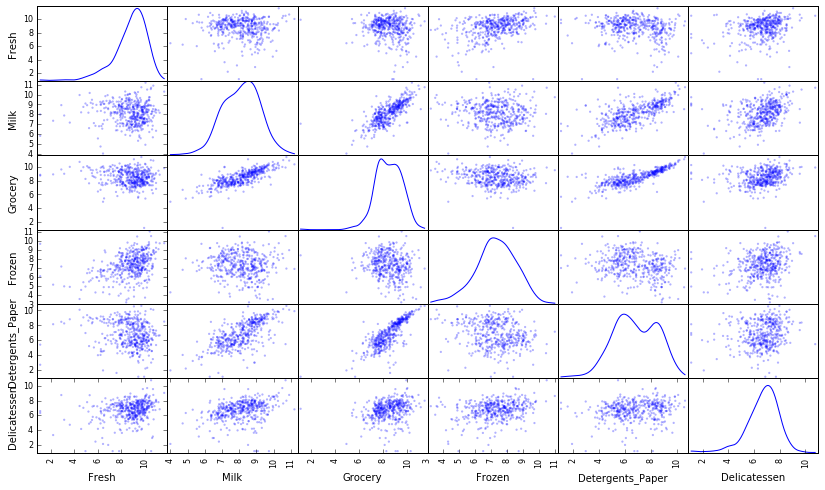

In [9]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data.copy(deep=True))

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples.copy(deep=True))

# Produce a scatter matrix for each pair of newly-transformed features
pd.plotting.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [10]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,8.904087,9.460632,9.835369,7.956477,8.972464,6.315358
1,10.236418,8.229244,8.848509,8.407155,6.401917,7.825245
2,8.264621,8.243019,7.403061,6.775366,5.983936,8.482395


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [18]:
# For each feature find the data points with extreme high or low values
from collections import Counter
indexs=[]

for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature],25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature],75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5*(Q3-Q1)
    
    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    indexs.extend(log_data.index[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))].tolist())

countTable = Counter(indexs)
print "Counter for the all the feature per data point in the Dataset."
print countTable

# OPTIONAL: Select the indices for data points you wish to remove
outliers  = [154,128,65,66,75]

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

#returns the dimension of the dataset with no outliers in it.
print ""
print "Shape of the dataset with no outliers:"
print good_data.shape


Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


Counter for the all the feature per data point in the Dataset.
Counter({154: 3, 128: 2, 65: 2, 66: 2, 75: 2, 193: 1, 264: 1, 137: 1, 142: 1, 145: 1, 412: 1, 285: 1, 161: 1, 420: 1, 38: 1, 171: 1, 429: 1, 175: 1, 304: 1, 305: 1, 439: 1, 184: 1, 57: 1, 187: 1, 203: 1, 325: 1, 289: 1, 81: 1, 338: 1, 86: 1, 343: 1, 218: 1, 95: 1, 96: 1, 353: 1, 98: 1, 355: 1, 356: 1, 357: 1, 233: 1, 109: 1, 183: 1})

Shape of the dataset with no outliers:
(435, 6)


### Question 4
*Are there any data points considered outliers for more than one feature based on the definition above? Should these data points be removed from the dataset? If any data points were added to the `outliers` list to be removed, explain why.* 

**Answer:**

Yes, there are multiple datapoints in the dataset that have been considered as an outlier for more than one feature based on the definition above and these datapoints should be definitely removed from the dataset.

Yes, A total of **5 Datapoints** have been added to outliers list to be removed. These points need to be removed because they don't capture the trend of the customer purchase pattern and deviate the calculation values i.e. the measure of central tendencies like Mean, Median and Standard Deviation e.t.c.



## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

[ 0.44302505  0.26379218  0.1230638   0.10120908  0.04850196  0.02040793]
Dimension 1    0.4430
Dimension 2    0.7068
Dimension 3    0.8299
Dimension 4    0.9311
Dimension 5    0.9796
Dimension 6    1.0000
Name: Explained Variance, dtype: float64


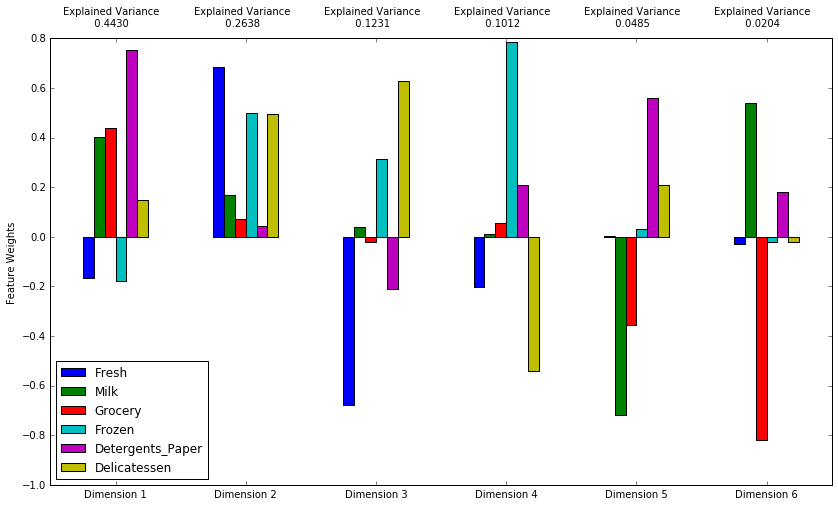

In [29]:
from sklearn.decomposition import PCA
# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA()
pca=pca.fit(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

print pca.explained_variance_ratio_

print pca_results['Explained Variance'].cumsum()

### Question 5
*How much variance in the data is explained* ***in total*** *by the first and second principal component? What about the first four principal components? Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.*  
**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the indivdual feature weights.

**Answer:**
<br>
**0.706817** is total variance proportion that is explained by first and second principal component.
<br> **0.93110** is total variance proportion that is explained by first four principal components. 



In the visualization above, we can see the linear coefficients of each feature for the components. High positive/negative values indicate that the corresponding features contributs a lot to the components value (in either positive or negative way). Low values mean that the feature has no impact. The first 4 components can thus be described as follows:

- **Component 1**: Significant positive weight is placed on Detergents & Paper (weight ~0.8) and meaningful weight is placed on Milk and Grocery (weights > 0.4). This component can be described as spending on retail goods.

- **Component 2**: Significant positive weight is placed on Fresh (weight ~0.7) and meaningful weight is placed on Frozen and Delicatessen (weights ~0.5). This component can be described as characteristic of restaurants and hotels with Deli food.

- **Component 3**: Significant positive weight is placed on Delicatessen (weight ~0.6) and significant negetive weight is placed on Fresh (weight ~-0.7). Meaningful positive weight is placed on Frozen (weight ~ 0.3). This component can be described as characteristic of a market that sells Delicatessen items with good amount of frozen products.

- **Component 4**: Significant positive weight is placed on Fresh (weight ~0.8) and significant negetive weight is placed on Delicatessen (weight ~-0.5). This component can be described as characteristic of spending on of-the-shelf Fresh goods it can be a Vegetable market.



### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [21]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,2.5781,0.6356,-0.5657,1.2230,-0.2918,-0.0218
1,-0.3573,2.1363,0.1368,-0.1236,-0.1559,-0.4240
2,-0.5797,0.1741,1.4887,-1.5268,0.1929,0.7713


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [22]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2).fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)


# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [23]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,2.5781,0.6356
1,-0.3573,2.1363
2,-0.5797,0.1741


## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

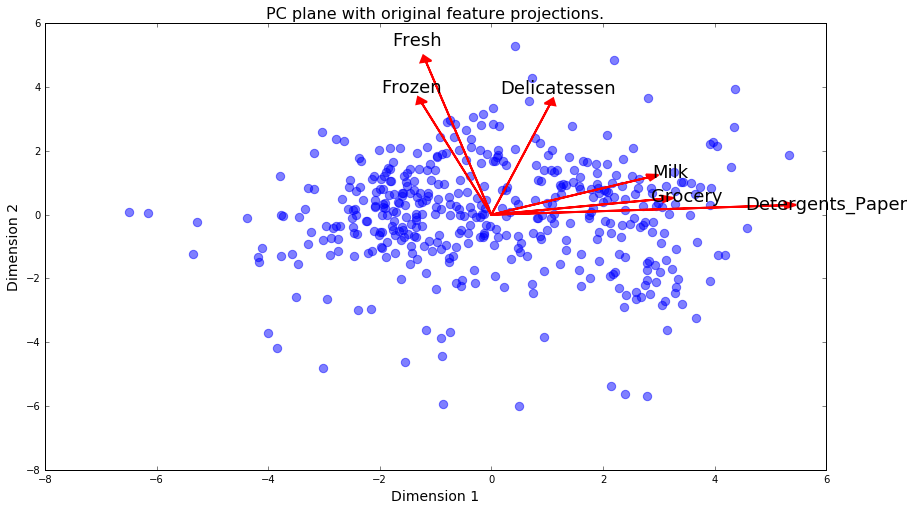

In [24]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6
*What are the advantages to using a K-Means clustering algorithm? What are the advantages to using a Gaussian Mixture Model clustering algorithm? Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?*

**Answer:**
In general, the advantange of Gaussian Mixture Models over k-means clustering is that GMMs:
 - Delivers a soft-assignment of clusters. That is, each data point is assigned a probability for each cluster, indicating how likely it belongs to the cluster. K-means only provides hard assignments, i.e., it chooses a single cluster for each data point. 
 - GMMs can also fit more complex cluster shapes since each mixture component can freely fit its covariance matrix. K-means clustering assigns data poins to the closest cluster in terms of Euclidian distance. Thus, it treats distances in all directions equally.
 
The advantage of k-means comapred to GMMs is that :
- It is much faster. For GMMs, many parameters must be fitted to the data (quadratic in the number of features) while k-means only maintains cluster centers (linear in number of features). Therefore k-means will be much quicker to train.

It is possible to make **GMMs** a lot more scalabe by constraining the covariance matrices of the mixture components. Usually, it is useful to use diagonal matrixes so that the number of paramters grows linear with the number of features. Going even further, you can also use isotropic covariance matrices, which a multiples of the identity matrix (i.e., have only one free parameter). While these constraints make **Gaussian Mixture Models** more scalabe, they also reduce some of the benefits. 
**K-means** can be seen as a special (limit) case of **GMMs**, specifically as **Gaussian Mixture models** with diagonal, equal and small covariance matrices. But,since the dataset it not too huge, I will go with **Gaussian Mixture Models**. I will try full covariance matrices first and add constraints if the problem is computational infeasable.



### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [25]:
# TODO: Apply your clustering algorithm of choice to the reduced data 
from sklearn.mixture import GMM
from sklearn.metrics import silhouette_score

for i in range(2,10):
    clusterer = GMM(n_components=i,covariance_type='full',random_state=42).fit(reduced_data)

    # TODO: Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)

    # TODO: Find the cluster centers
    centers = clusterer.means_

    # TODO: Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(pca_samples)

    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data,preds)
    
    print "mean silhoutte coefficient for %d clusters is %f."%(i,score)

    
clusterer = GMM(n_components=2,covariance_type='full',random_state=42).fit(reduced_data)

# TODO: Predict the cluster for each data point
preds = clusterer.predict(reduced_data)

# TODO: Find the cluster centers
centers = clusterer.means_

# TODO: Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(pca_samples)

# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
score = silhouette_score(reduced_data,preds)
print 
print
print "----------------------Using the best value from above-------------------------"
print "mean silhoutte coefficient for %d clusters is %f."%(2,score)

mean silhoutte coefficient for 2 clusters is 0.411750.
mean silhoutte coefficient for 3 clusters is 0.398432.
mean silhoutte coefficient for 4 clusters is 0.289414.
mean silhoutte coefficient for 5 clusters is 0.191037.
mean silhoutte coefficient for 6 clusters is 0.296321.
mean silhoutte coefficient for 7 clusters is 0.310557.
mean silhoutte coefficient for 8 clusters is 0.206250.
mean silhoutte coefficient for 9 clusters is 0.178274.


----------------------Using the best value from above-------------------------
mean silhoutte coefficient for 2 clusters is 0.411750.


### Question 7
*Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score?* 

**Answer:**
Following are the silhouette score for several cluster numbers that I have tried:
- mean silhoutte coefficient for 2 clusters is 0.411750.
- mean silhoutte coefficient for 3 clusters is 0.398432.
- mean silhoutte coefficient for 4 clusters is 0.289414.
- mean silhoutte coefficient for 5 clusters is 0.191037.
- mean silhoutte coefficient for 6 clusters is 0.296321.
- mean silhoutte coefficient for 7 clusters is 0.310557.
- mean silhoutte coefficient for 8 clusters is 0.206250.
- mean silhoutte coefficient for 9 clusters is 0.178274.

For **N(clusters) = 2** we have got the best silhoutte score. 



### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

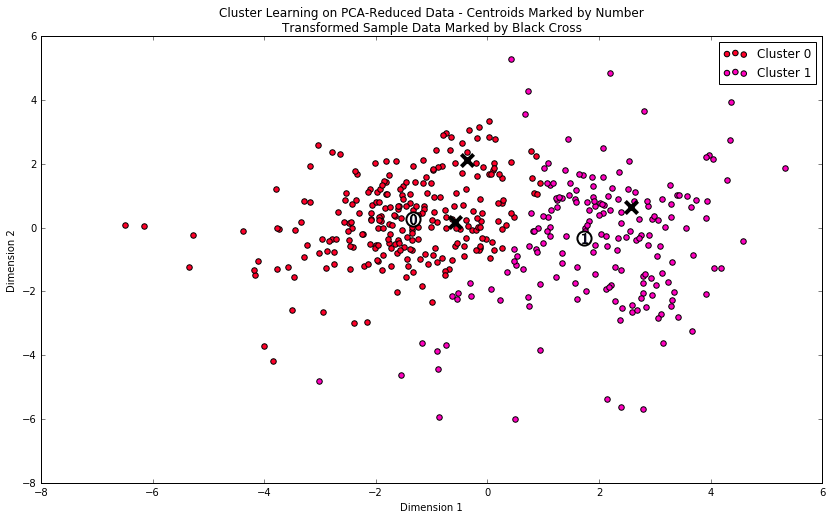

In [26]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,9606.0,2068.0,2675.0,2195.0,331.0,752.0
Segment 1,3812.0,6414.0,9838.0,942.0,3242.0,886.0




Statistical analysis of good dataset.


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000
mean,12089.372414,5788.103448,7911.158621,3096.126437,2848.473563,1536.797701
std,12662.796341,7374.172350,9365.740973,4873.769559,4679.364623,2833.363881
min,3.000000,112.000000,218.000000,25.000000,3.000000,3.000000
25%,3208.000000,1579.500000,2156.000000,770.500000,260.000000,411.500000
50%,8565.000000,3634.000000,4757.000000,1541.000000,813.000000,967.000000
75%,16934.500000,7168.000000,10665.500000,3559.500000,3935.000000,1825.500000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


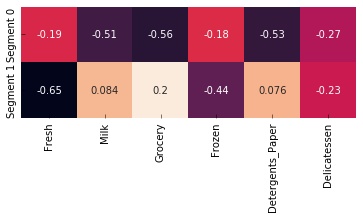

In [27]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

import seaborn as sns

sns.heatmap((true_centers-data.mean())/data.std(ddof=1), annot=True, cbar=False, square=True)

print 
print 
print "Statistical analysis of good dataset."
display(np.exp(good_data).describe())

### Question 8
Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. *What set of establishments could each of the customer segments represent?*  
**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`.

**Answer:**
From the  above statistical good data available to us we can conclude the following:

**Segment 0** <br>
There is a 75 percentile consumption of fresh good followed by low(25%) and moderate(~50%) percentile consumption of grocery and frozen and very low consumption of detergents_Paper and Delicatessen. This could be a restaurant with small amount of deli food.

**Segment 1** <br>
There good consumption of milk , and frozen products i.e. above average, moderate consumption of Grocery, Detergent_Paper and Delicatessen. This can be a retail shop that sells all these stuffs.

### Question 9
*For each sample point, which customer segment from* ***Question 8*** *best represents it? Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [31]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred

Sample point 0 predicted to be in Cluster 1
Sample point 1 predicted to be in Cluster 0
Sample point 2 predicted to be in Cluster 0


**Answer:**

Yes , all the sample points are in predicted in right  cluster.<br><br>
**Sample Point 0** <br>
As observed, there is moderate consumption of Fresh, Milk and Grocery products ,also high consumption of Detergents_paper just as observed for centre 1. It is likely that the point will lie in cluster 1.<br><br>
**Sample Point 1 and 2** <br>
As observed , there is low consumption of Detergents_Paper,significant consumption of Delicatessen and moderate consumption of all the other commodities just like centre 0. It is likely that both the points will lie in cluster 0.  

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. *How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*  
**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:**
The wholesale distributor can use this customer segments to determine whether a customer segment will reacte positively to the change in delivery service or not.
Like for e.g.

If the delivery service is change from 5 days a week to 3 days a week then all the customer segments that demand for fresh goods will suffer. Products will no longer be fresh and hence, they will definately critise this change.
On the other hand , if a customer segment doesn't depend on fresh products that much, will remain unaffected. Although this may reduce the transportation and logding cost for both the parties i.e. wholesaler and retailer.  


An effective A/B testing program will be able to statistically prove if changing the delievery service will make different customer segments react positively or negatively to the change, or none at all.

A/B Testing can be done by randomly selecting a sample set of customers from each customer segment and apply the new delivery services as they are designed. Their feedback on the new services will dictate if the services should be rolled out on other customers of the same segments depending on if the service is successful with the A/B testing group.

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
*How can the wholesale distributor label the new customers using only their estimated product spending and the* ***customer segment*** *data?*  
**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:**

I can see two different ways to assign new customers to a segment:

- Use the clustering algorithm itself to create the assignment: Both **k-means** and **GMMs** perform during training some kind of E-step in which they assign data points to clusters based on the current parameters for the clustering. We could keep the cluster parameterisation fixed and perform these E-steps for the new data points to include them into the clustering (without changing the clusters themselves).

- Use a supervised learning algorithm to "learn" how to distinguishes between clusters: You could interpret the cluster assignments as labels for a supervised learning algorithm. If the algorithm is sufficiently good at reproducing the cluster assignments, it will also do a good job at assigning cluster labels to new data points.

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

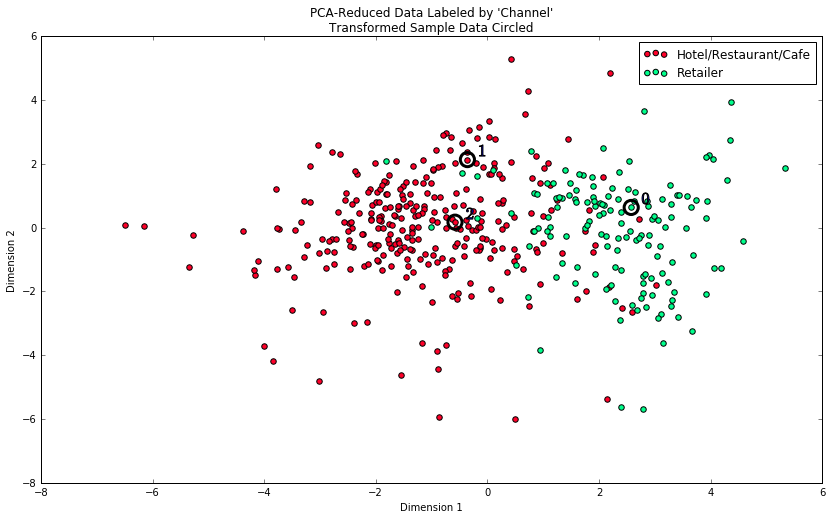

In [32]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)

### Question 12
*How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?*

**Answer:**

It seems to perform quite well since 2 clusters are what the shilouette score recommended to use and, coincidentally, 2 clusters are what the creators of the dataset grouped the customers into. The clustering is consistent with what I suspected earlier about the data.


Regarding data points that could be classified as purely one or the other segment, there are some data points of this kind. Most data points though are somewhat ambiguous and do not clearly belong to one cluster or the other. There is considerable overlap in the true distribution. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.